<a href="https://colab.research.google.com/github/RobinCHoffpauir/saber/blob/main/src/notebooks/game_logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 32.9 MB/s eta 0:00:00


In [3]:

import pybaseball as pyb, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
pyb.cache.enable()
import numpy as np

In [51]:
# parse the database "pitch_arsenal2023.db" and print the table structure
import sqlite3
# connect to database
con = sqlite3.connect('/content/Final_Data.db')

# create cursor object and save the data into a dataframe with the names of the columns saved
cursor = con.cursor()
query = "SELECT * FROM 'Parsed_Final_Data'"
data_list = cursor.execute(query).fetchall()

columns = [i[0] for i in cursor.description]
data_ready = pd.DataFrame.from_records(data_list, columns=columns)


In [54]:
columns

['index',
 'Tm',
 'Home_Away',
 'Opp',
 'Inn',
 'Rank',
 'GB',
 'D/N',
 'cLI',
 'Streak',
 'WinningPct',
 'EMA10RunsScored',
 'EMA10RunsAllowed',
 'TmElo',
 'OppElo',
 'Win_Loss',
 'Winning Percentage']

In [ ]:
# create a new column with the win/loss indicator using 1 for wins and 0 for losses
#data_parsed['Win_Loss'] = data_parsed['W/L'].apply(lambda x: 1 if x.startswith('W') else 0)

#data_parsed['Tm'].fillna('MIA', inplace=True)
#data_parsed['Opp'].fillna('MIA', inplace=True)
## Check if there are any NaN values after mapping
#print(data_parsed['Tm'].isna().sum())
#print(data_parsed['Opp'].isna().sum())

#
#team_ids = pyb.team_ids(2021)
#teamids = team_ids[['teamIDBR','teamIDfg']]
#teamids = teamids.set_index('teamIDBR')
#
#
#id_changes = {
#    'ANA': 'LAA',
#    'MON': 'WSN',
#    'TBD': 'TBR',
#    'FLA': 'MIA',
# # This shows how changes can overlap or be redefined
#}
## Mapping with fallback to original values
#data_parsed['Tm'] = data_parsed['Tm'].map(id_changes)
#data_parsed['Opp'] = data_parsed['Opp'].map(id_changes)
#data_parsed['Tm'].fillna('MIA', inplace=True)
#data_parsed['Opp'].fillna('MIA', inplace=True)

# def transform_gb(value):
#    value = value.strip().lower()  # Normalize the string by stripping whitespace and converting to lower case
#    if value.startswith('up'):
#        # Handle concatenated "up" values without space
#        number_part = value.replace('up', '').strip()
#        return float(number_part) if number_part else 0
#    elif value == 'tied':
#        return 0
#    else:
#        return -float(value)
#
#data_parsed['GB'] = data_parsed['GB'].apply(transform_gb)


#data_parsed.to_sql('Final_Data', con, if_exists='replace', index=False)

#data_parsed['D/N'] = data_parsed['D/N'].apply(lambda x: 1 if x == 'D' else 0)
# Define a function to calculate winning percentage
#def calculate_winning_percentage(record):
#    wins, losses = map(int, record.split('-'))
#    total_games = wins + losses
#    # Calculate the winning percentage
#    winning_percentage = int((wins / total_games) [] 100)
#    return winning_percentage
#
## Apply the function to the Record column and create a new column
#data_parsed['Winning Percentage'] = data_parsed['W-L'].apply(calculate_winning_percentage)
#data_ready['Tm'] = data_ready['Tm'].astype('float')
#data_ready['Opp'] = data_ready['Opp'].astype('float')
##cols = data_parsed.columns.to_list()
#data_ready = data_parsed.drop(['Date','W/L','W-L','R','RA','Win','Loss','Save','Time'], axis=1)
#data_ready['Tm'] = data_ready['Tm'].replace('MIA',20)
#data_ready['Opp'] = data_ready['Opp'].replace('MIA',20)
#print(data_ready['Opp'].unique())
#data_ready.info()
#data_ready.to_sql('Parsed_Final_Data', con, if_exists='replace')

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
#
## Set up the parameter grid
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 1, 5, 10],
#    'min_samples_split': [1,2,4],
#    'min_samples_leaf': [1, 2, 4],
#}
#
## Initialize the classifier
#rfc = RandomForestClassifier(random_state=42)
#
## Set up the grid search
#grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
#
## Fit grid search to the data
#grid_search.fit(X_train, y_train)
#best_classifier = grid_search.best_estimator_

# Predict and evaluate
#predictions = best_classifier.predict(X_test)
#print(f'Best parameters: {grid_search.best_params_}')
#print(f'Accuracy: {accuracy_score(y_test, predictions)}')

In [29]:
# @title
from sklearn.model_selection import train_test_split

X = data_ready.drop(['Win_Loss','Winning Percentage','Streak'], axis=1)  # Features
y = data_ready['Win_Loss']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 1.0

In [30]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2)

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# prompt: output all precision metrics of Random Forest CLassifier saved in variable "rfc"

from sklearn.metrics import classification_report

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.94      0.93      9059
           1       0.94      0.93      0.93      9148

    accuracy                           0.93     18207
   macro avg       0.93      0.93      0.93     18207
weighted avg       0.93      0.93      0.93     18207



In [35]:
# prompt: calculate and output advanced precision/accuracy metrics of a random forest classifier model

print("Classification Report (Precision, Recall, F1-Score, Support):")
print(classification_report(y_test, y_pred))


Classification Report (Precision, Recall, F1-Score, Support):
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      9059
           1       0.94      0.93      0.93      9148

    accuracy                           0.93     18207
   macro avg       0.93      0.93      0.93     18207
weighted avg       0.93      0.93      0.93     18207



In [34]:
from sklearn.metrics import accuracy_score
predictions = rfc.predict(X_test)
random_results = accuracy_score(y_test, predictions)
print(f"Random Forest Accuracy: {random_results}")

Random Forest Accuracy: 0.9339814357115395


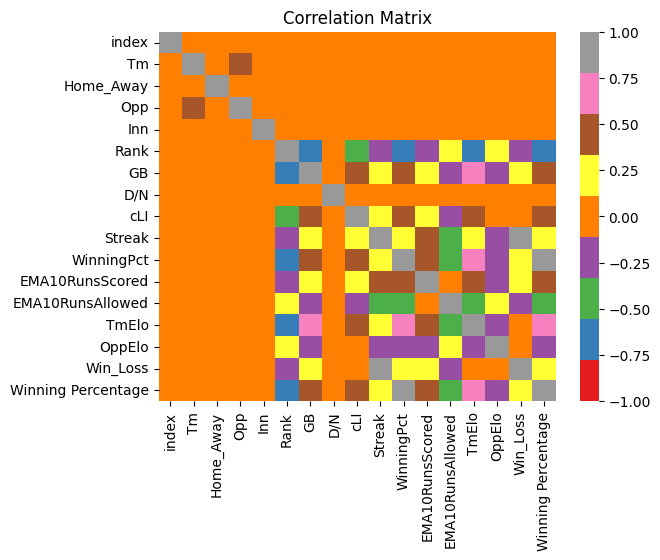

In [41]:
data_ready.columns

Index(['index', 'Tm', 'Home_Away', 'Opp', 'Inn', 'Rank', 'GB', 'D/N', 'cLI',
       'Streak', 'WinningPct', 'EMA10RunsScored', 'EMA10RunsAllowed', 'TmElo',
       'OppElo', 'Win_Loss', 'Winning Percentage', 'Tm_Prev_Win_Loss',
       'Is_Tied_Or_Ahead', 'Abs_GB', 'WinPct_x_GB', 'roll_win5', 'elo_diff',
       'elo_hfa', 'run_ratio10', 'rest_days', 'dow_sin'],
      dtype='object')

In [39]:
# assuming `df` is Parsed_Final_Data with a datetime index `Date`
# Convert the index to datetime objects if it's not already
data_ready.index = pd.to_datetime(data_ready.index)

data_ready['roll_win5']      = data_ready['Win_Loss'].rolling(5).mean()
data_ready['elo_diff']       = data_ready['TmElo'] - data_ready['OppElo']
data_ready['elo_hfa']        = data_ready['elo_diff'] * data_ready['Home_Away']
data_ready['run_ratio10']    = (data_ready['EMA10RunsScored'] + 1) / (data_ready['EMA10RunsAllowed'] + 1)
# Now the .dt accessor will work correctly on the datetime index
data_ready['rest_days']      = data_ready.index.to_series().diff().dt.days.fillna(0)
data_ready['dow_sin']        = np.sin(2*np.pi * data_ready.index.weekday/7)
data_ready['pythag_expect']  = data_ready['R']**2 / (data_ready['R']**2 + data_ready['RA']**2)

KeyError: 'R'

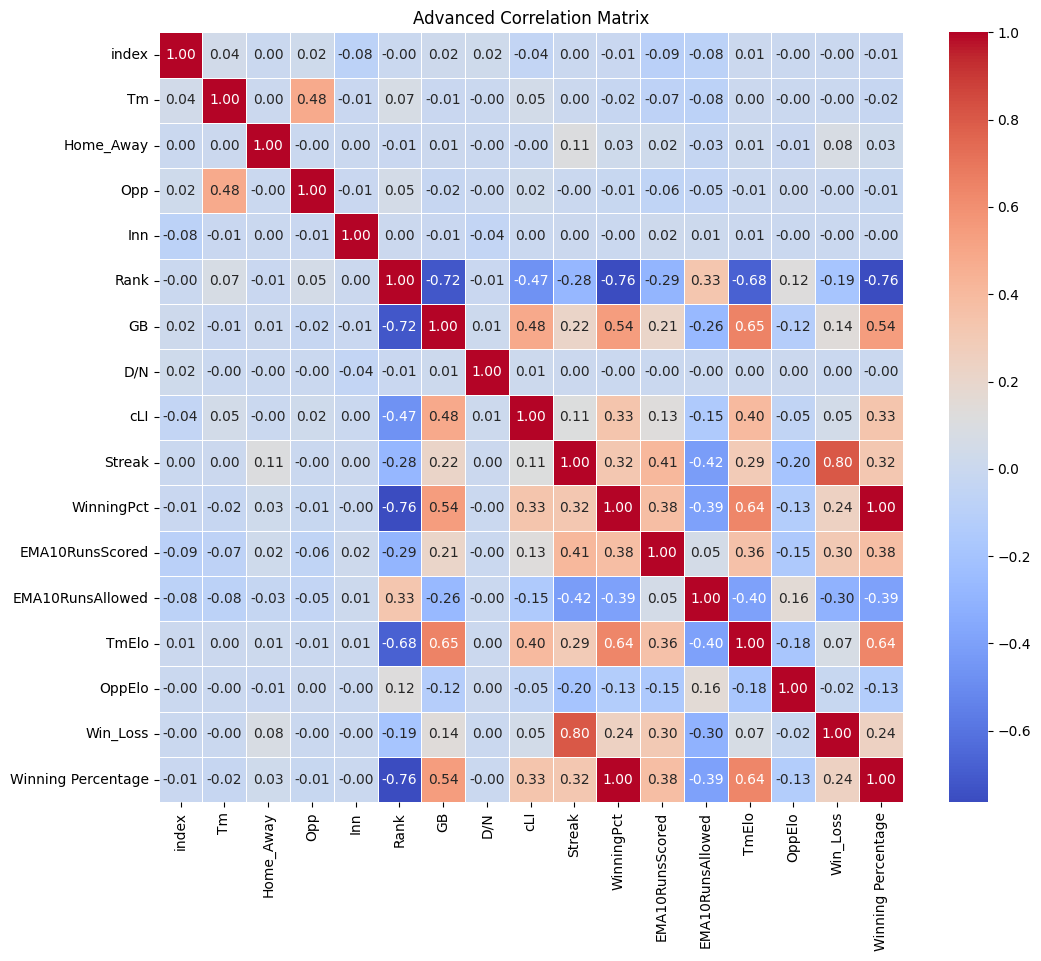

In [36]:
# prompt: visualize advanced correlation metrics from variable "corr"

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Advanced Correlation Matrix')
plt.show()

In [23]:
corr['Win_Loss'].sort_values(ascending=False)

,Win_Loss
Win_Loss,1.000000
Streak,0.802501
EMA10RunsScored,0.304739
Winning Percentage,0.243208
WinningPct,0.243103
GB,0.135432
Home_Away,0.082664
TmElo,0.071488
cLI,0.049112
D/N,0.000138


In [24]:
#the above code shows the correlation between the features and the target variable.
#---------------------------------
#|Win_Loss             | 1.000000|
#|Streak               | 0.802501|
#|EMA10RunsScored      |0.304739|
#|Winning Percentage   | 0.243208|
#|WinningPct           | 0.243103|
#|GB                   | 0.135432|
#|Home_Away            | 0.082664|
#|TmElo                | 0.071488|
#|cLI                  | 0.049112|
#|D/N                  | 0.000138|
#|Inn                  |-0.000719|
#|Tm                   |-0.001382|
#|index                |-0.002147|
#|Opp                  |-0.003969|
#|OppElo               |-0.019190|
#|Rank                 |-0.188062|
#|EMA10RunsAllowed     |-0.303661|
#Name: Win_Loss, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

print(f"Model RMSE: {rmse}")

InvalidParameterError: The 'y_true' parameter of mean_squared_error must be an array-like. Got 0 instead.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # X_train.shape[1] is the number of features
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification, 'softmax' for multiclass
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])




C:\Users\rhoffpauir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predict)

569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step


In [ ]:
print(accuracy)

0.5024441149008623
